## CSCI S-89C Deep Reinforcement Learning, Summer 2020
### Section 2

## k-armed Bandit Problem: $\varepsilon$-greedy Actions

Environment generates rewards with mean 4, 6, 8, and 10 for actions 1, 2, 3, and 4, respectively:

In [3]:
import random
from matplotlib import pyplot as plt 
import numpy as np

class Environment:
    def __init__(self):
        self.time = 1

    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        q_star = 2+2*action
        return random.gauss(q_star,1)

Agent follows the $\varepsilon$-greedy selection method with $\varepsilon$ = 0.10 and the action value estimated by (2.3) of "Reinforcement Learning" by Sutton and Barto:

In [18]:
class Agent:
    def __init__(self, k):
        self.current_reward = 0.0
        self.current_action = []
        self.Nt = np.zeros(k)
        self.Qt = np.full(k, fill_value=0.)

    def step(self, env, epsilon = 0.05):
        actions = env.admissible_actions()
        At = self.select_action(env, actions, epsilon)
        Rt = env.get_reward(At)
        
        self.Nt[At-1] = self.Nt[At-1]+1
        self.Qt[At-1] = self.Qt[At-1]+(1/self.Nt[At-1])*(Rt-self.Qt[At-1])
        
        self.current_action = At
        self.current_reward = Rt
        
    def select_action(self, env, actions, epsilon):
        rand_num = random.uniform(0,1)
        if rand_num <= 1-epsilon:
            action_selected = np.random.choice(np.flatnonzero(self.Qt == self.Qt.max()))+1
        else:
            action_selected = random.choice(actions)
        return action_selected

200 epochs for T = 1000, and compute the observed average reward for each time t. Plot the average reward from those 200 epochs for 1, 2,..., T. Please notice that T = 1000 this time.

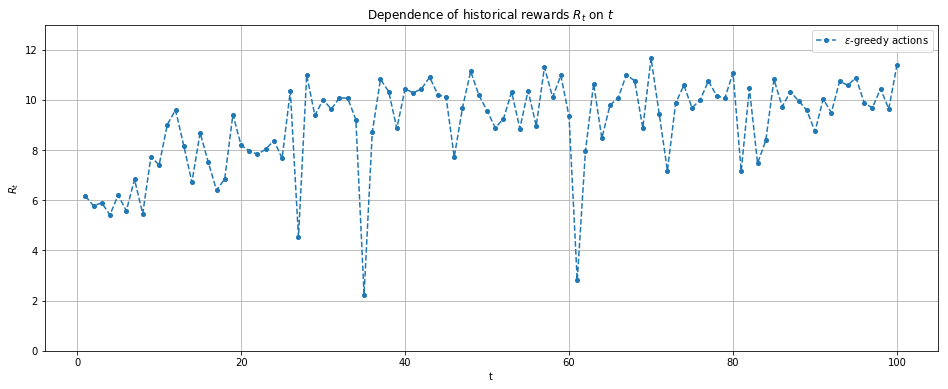

In [29]:
def rewards_hist(T = 10, k = 10, epsilon = 0.05):
    env = Environment()
    agent = Agent(k)
    rewards = []
    while env.time <= T:
        agent.step(env,epsilon)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np   
np.random.seed(167)
T = 100
k = 4
epsilon = 0.10

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),rewards_hist(T, k, epsilon), linestyle='--', marker='o', markersize=4, label='$\epsilon$-greedy actions')
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.title('Dependence of historical rewards $R_t$ on $t$')
plt.ylim(0, 13)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

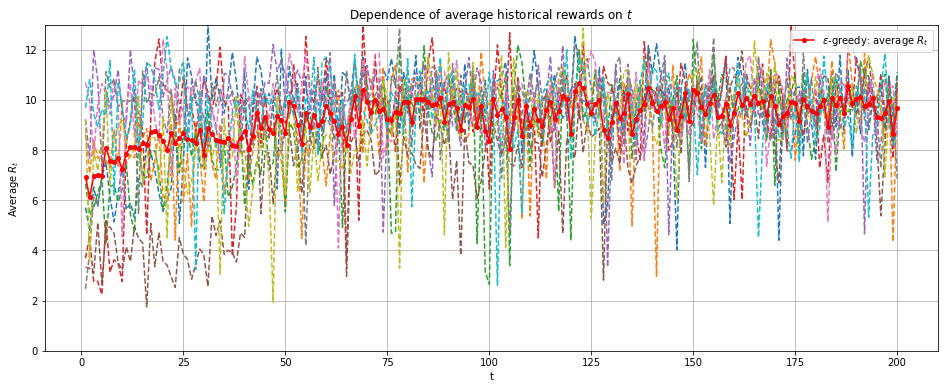

In [60]:
np.random.seed(167)
T = 200
k = 4
epsilon = 0.10
episodes = 10

all_rewards = []
for i in range(1, episodes+1):
    all_rewards.append(rewards_hist(T, k, epsilon))

all_rewards = np.asarray(all_rewards)
avg_rewards = (np.mean(all_rewards, axis=0))

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),np.transpose(all_rewards), linestyle='--', marker=None, markersize=4)
plt.plot(range(1,T+1),avg_rewards, linestyle='-', marker="o",color = "r", markersize=4, label='$\epsilon$-greedy: average $R_t$')
plt.xlabel("t")
plt.ylabel("Average $R_t$")
plt.title('Dependence of average historical rewards on $t$')
plt.ylim(0, 13)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()


Last 10 elements of average reward at times $t = T-9, T-8,\ldots,T$:

In [61]:
avg_rewards[(T-10):T]

array([10.12893839,  9.75651454,  9.85048767, 10.07343389,  9.29904058,
        9.2813752 ,  9.4781903 ,  9.96962121,  8.62918839,  9.68693561])

Increase the number of episodes:

In [62]:
np.random.seed(167)
T = 200
k = 4
epsilon = 0.10
episodes = 1000

all_rewards = []
for i in range(1, episodes+1):
    all_rewards.append(rewards_hist(T, k, epsilon))
    
all_rewards = np.asarray(all_rewards)
avg_rewards = (np.mean(all_rewards, axis=0))

In [63]:
avg_rewards[(T-10):T]

array([9.68561568, 9.66237891, 9.67569101, 9.66933111, 9.63865538,
       9.67978469, 9.66541898, 9.70358751, 9.67487308, 9.73357701])

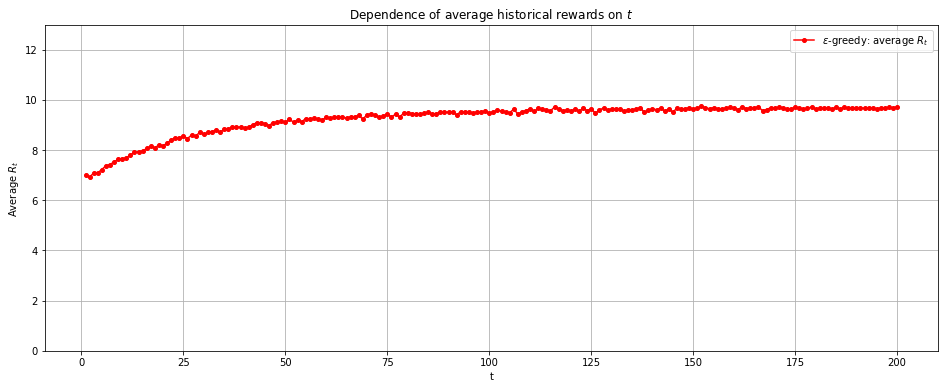

In [64]:
plt.figure(figsize=(16,6))
#plt.plot(range(1,T+1),np.transpose(all_rewards), linestyle='--', marker=None, markersize=4)
plt.plot(range(1,T+1),avg_rewards, linestyle='-', marker="o",color = "r", markersize=4, label='$\epsilon$-greedy: average $R_t$')
plt.xlabel("t")
plt.ylabel("Average $R_t$")
plt.title('Dependence of average historical rewards on $t$')
plt.ylim(0, 13)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

Let's look at the historical actions:

In [88]:
def actions_hist(T = 10, k = 10, epsilon = 0.05):
    env = Environment()
    agent = Agent(k)
    actions = []
    while env.time <= T:
        agent.step(env,epsilon)
        actions.append(agent.current_action)
    return np.asarray(actions)

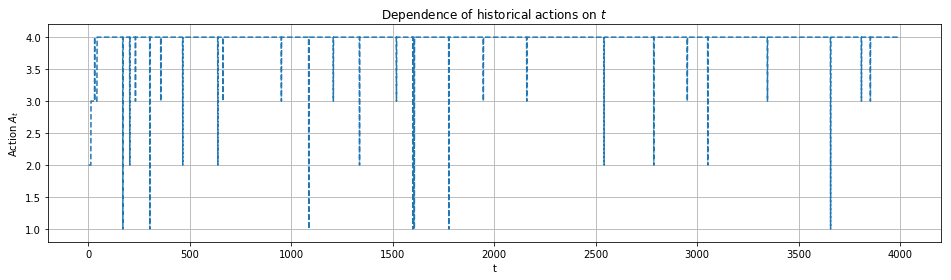

In [94]:
np.random.seed(167)
T = 4000
k = 4
epsilon = 0.01
episodes = 1

all_actions = []
for i in range(1, episodes+1):
    all_actions.append(actions_hist(T, k, epsilon))

all_actions = np.asarray(all_actions)
#avg_rewards = (np.mean(all_rewards, axis=0))

plt.figure(figsize=(16,4))
plt.plot(range(1,T+1),np.transpose(all_actions), linestyle='--', marker=None, markersize=4)
#plt.plot(range(1,T+1),avg_rewards, linestyle='-', marker="o",color = "r", markersize=4, label='$\epsilon$-greedy: average $R_t$')
plt.xlabel("t")
plt.ylabel("Action $A_t$")
plt.title('Dependence of historical actions on $t$')
plt.ylim(0.8, 4.2)
plt.grid(True)
#plt.legend(loc = 'upper right')
plt.show()

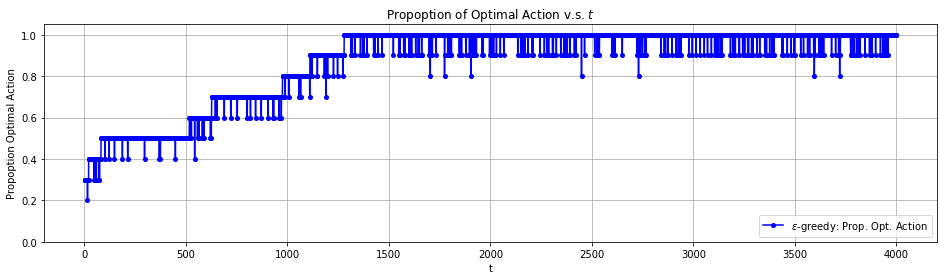

In [116]:
np.random.seed(167)
T = 4000
k = 4
epsilon = 0.01
episodes = 10

all_actions = []
for i in range(1, episodes+1):
    all_actions.append(actions_hist(T, k, epsilon))

all_actions = np.asarray(all_actions)
#avg_rewards = (np.mean(all_rewards, axis=0))
best_actions = (all_actions == 4)*1
prop_actions = np.sum(best_actions, axis=0) / episodes

plt.figure(figsize=(16,4))
#plt.plot(range(1,T+1),np.transpose(all_actions), linestyle='--', marker=None, markersize=4)
plt.plot(range(1,T+1),prop_actions, linestyle='-', marker="o",color = "b", markersize=4, label='$\epsilon$-greedy: Prop. Opt. Action')
plt.xlabel("t")
plt.ylabel("Propoption Optimal Action")
plt.title('Propoption of Optimal Action v.s. $t$')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()